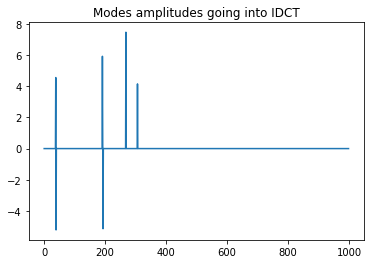

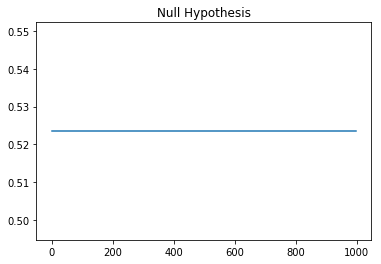

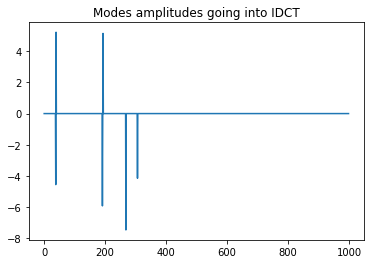

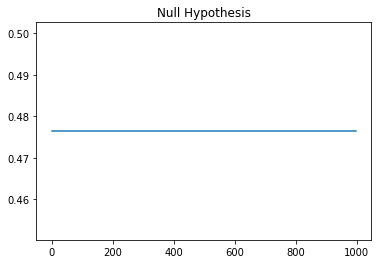

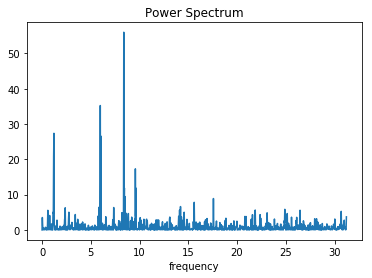

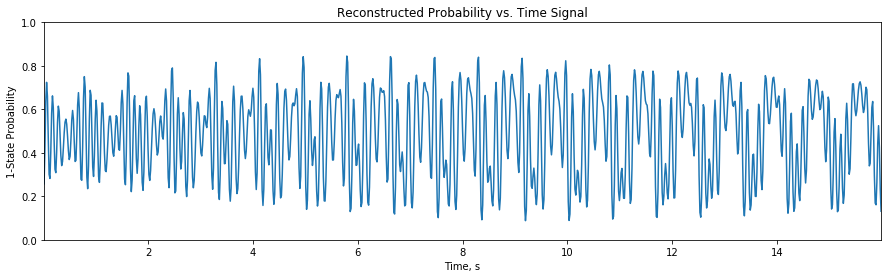

In [2]:
import pygsti
import matplotlib.pyplot as plt
from pygsti.extras import drift
import numpy as np
from data_list_creator import create_data, gate_string_to_list, gate_list_to_string, SNR

#################################################################################################################
gate_string = "(Gx)^49"
nSamples = 1000  #total samples to take for each measurement
nCounts = 1   #total shots to take per timestamped sample
time_per_count = 0.016 #seconds
time_units = 1e-3 #seconds. This should be the max resolution you expect to input at any given time (i.e. everthing on the scale of 1e-3 s or more)
res = 1
noise_type='Sine' #Sine, Random Walk, Telegraph
plot_noise=False
walking_amp = 0.0001
low_frequency_noise = [np.round(0.0015*i, 4) for i in range(5)]
low_frequency_noise = [] #uncomment this to eliminate low_frequency noise
low_frequency_amps = [0.005*i for i in range(len(low_frequency_noise))]
low_frequency_phase = [0]*len(low_frequency_noise)
freq_list=[1.2, 6, 8.4, 9.6] + low_frequency_noise
amp_list=[0.01, 0.01, 0.01, 0.01] + low_frequency_amps
phase_list=[0,0,0,0] + low_frequency_phase
telegraph_amp = 0.02
start_f = 0.1
stop_f = 2
fluctuators= 40
add_noise=0.01
    


##############################################################################################################
#Don't change anything below this line for regular program operation
freq_list = tuple(freq_list)
amp_list = tuple(amp_list)
phase_list = tuple(phase_list)
time_per_sample = nCounts*time_per_count

ones_count_array, zeros_count_array,\
        timestamp_array, probs_array, sig = create_data( \
                                                   time_per_count, nSamples, nCounts, gate_string_to_list(gate_string), time_units,\
                                                   noise_type, walking_amp, telegraph_amp,res, freq_list, \
                                                   amp_list, phase_list, start_f, stop_f,fluctuators,plot_noise,add_noise)
counts_per_timestep = ones_count_array[0] + zeros_count_array[0] #the number of samples per timestep (zeros or ones)
drifted = drift.do_basic_drift_characterization(ones_count_array, counts=counts_per_timestep, timestep=time_per_sample,timestamps=timestamp_array, verbosity = 0)

        
#analyze the frequency-power spectrum
frequencies = list(drifted.frequencies)
power_spectrum = list(drifted.pspepo_power_spectrum[0,0,1,:])
plt.plot(frequencies, power_spectrum)
plt.xlabel("frequency")
plt.title("Power Spectrum")
plt.show()

fig = plt.figure(figsize=(15,4))
plt.plot(timestamp_array, drifted.pspepo_reconstruction[0,0,1,:])
plt.title("Reconstructed Probability vs. Time Signal")
plt.xlabel("Time, s")
plt.xlim(timestamp_array[0], timestamp_array[-1])
plt.ylim(0,1)
plt.ylabel("1-State Probability")
plt.show()

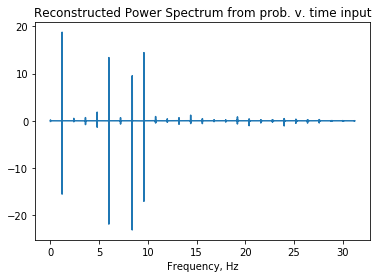

In [15]:
plt.plot(drifted.frequencies, drifted.pspepo_reconstruction_power_spectrum[0,0,1,:])
plt.title("Reconstructed Power Spectrum from prob. v. time input")
plt.xlabel("Frequency, Hz")
plt.show()